In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3.1 Dataset Overview

In [2]:
import pandas as pd
# Load the dataset =
df = pd.read_csv('/content/drive/MyDrive/DataSets for Panda/WHR-2024-5CS037.csv')

# Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Identify the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# List all the columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

3.1 Basic Statisitics

In [5]:
# Basic Statistics
print("\nBasic Statistics:")
print(f"Mean Score: {df['score'].mean()}")
print(f"Median Score: {df['score'].median()}")
print(f"Standard Deviation of Score: {df['score'].std()}")

country_highest_score = df.loc[df['score'].idxmax(), 'Country name']
country_lowest_score = df.loc[df['score'].idxmin(), 'Country name']
print(f"Country with the highest happiness score: {country_highest_score}")
print(f"Country with the lowest happiness score: {country_lowest_score}")


Basic Statistics:
Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995
Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


3.1 Missing Values

In [6]:
# Missing Values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



Missing Values:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


3.1 Filtering and Sorting

In [7]:
# Filtering and Sorting
filtered_df = df[df['score'] > 7.5]
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("\nFiltered and Sorted Dataset (Top 10 rows by GDP per Capita):")
print(sorted_df.head(10))



Filtered and Sorted Dataset (Top 10 rows by GDP per Capita):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


3.1 Adding new columns

In [9]:
# Adding New Columns
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("\nDataset with Happiness Category column added:")
print(df.head(10))


Dataset with Happiness Category column added:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.

2. Data Visualizations

<ipython-input-18-b4b888e8993f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


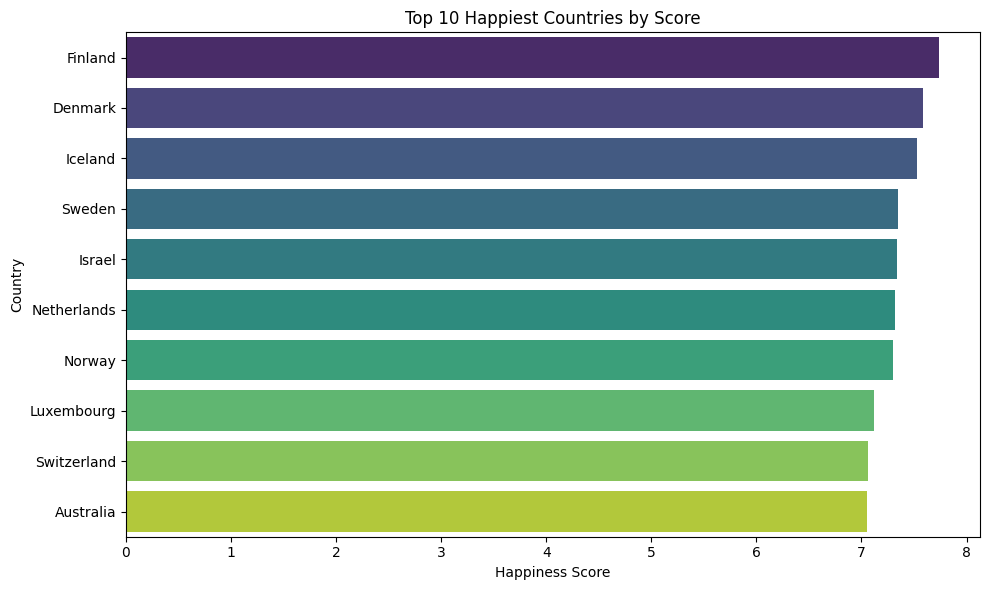

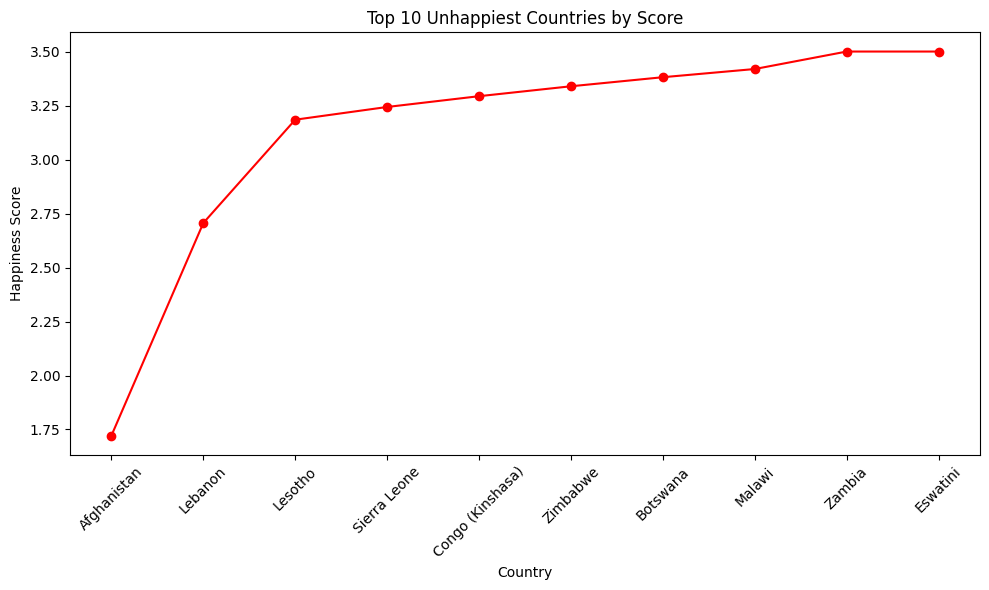

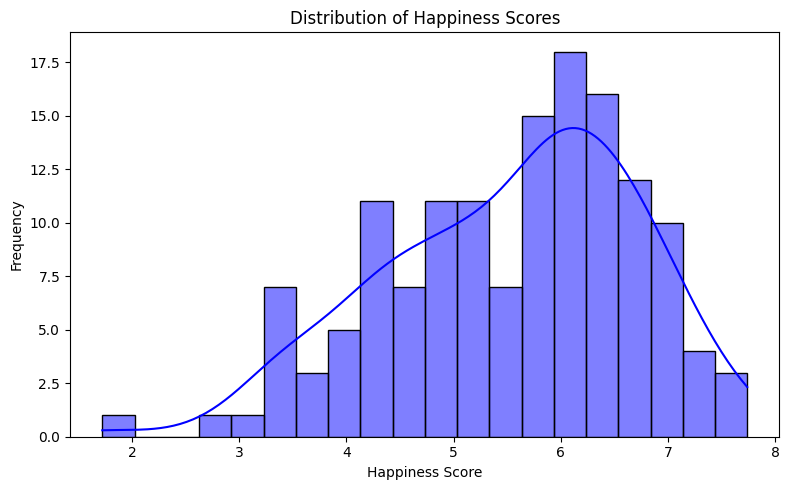

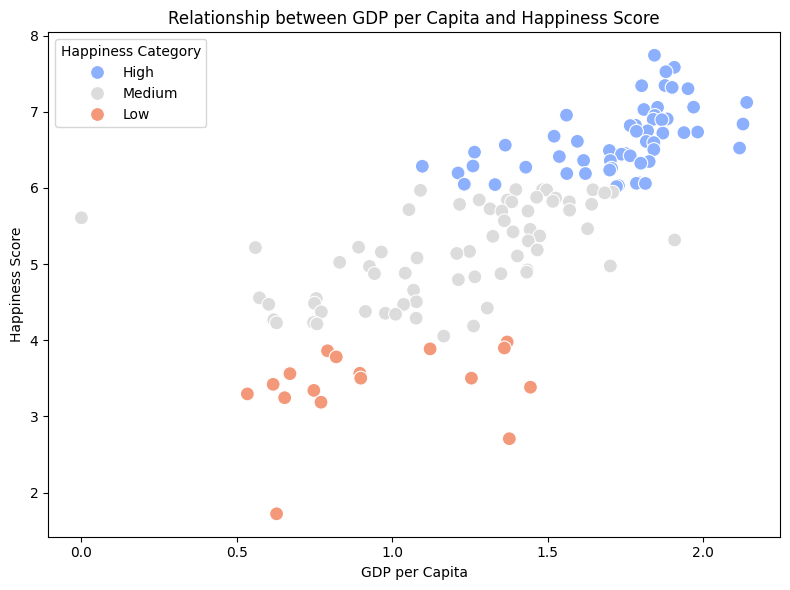

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot: Top 10 happiest countries by Score
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Line Plot: Top 10 unhappiest countries by Score
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red', linestyle='-')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram: Distribution of the Score column
plt.figure(figsize=(8, 5))
sns.histplot(df['score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Interpretation of Histogram:
# The histogram shows the spread of happiness scores across countries.
# If the distribution is skewed left, more countries have higher happiness scores.
# If skewed right, more countries have lower happiness scores.
# The KDE curve helps to visualize the probability density.

# Scatter Plot: GDP per Capita vs. Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness Category', palette='coolwarm', s=100)
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()



3.2 Task 1: Preparing the South-Asia Dataset

In [19]:
# Step 1: Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Step 2: Filter the dataset for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Display the filtered dataset
print("Filtered Dataset for South Asian Countries:")
print(south_asia_df)

# Step 3: Save the filtered dataframe as a CSV file
south_asia_df.to_csv('south_asian_happiness_data.csv', index=False)
print("\nFiltered dataset saved as 'south_asian_happiness_data.csv'")

Filtered Dataset for South Asian Countries:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091

Task 2: Composite Score Ranking

South Asian Countries Ranked by Composite Score:
  Country name  Composite Score
0    Sri Lanka           1.0739
1        Nepal           0.8159
2        India           0.7874
3     Pakistan           0.7039
4   Bangladesh           0.6774
5  Afghanistan           0.3238


<ipython-input-26-e95c6abc0030>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='Blues_r')


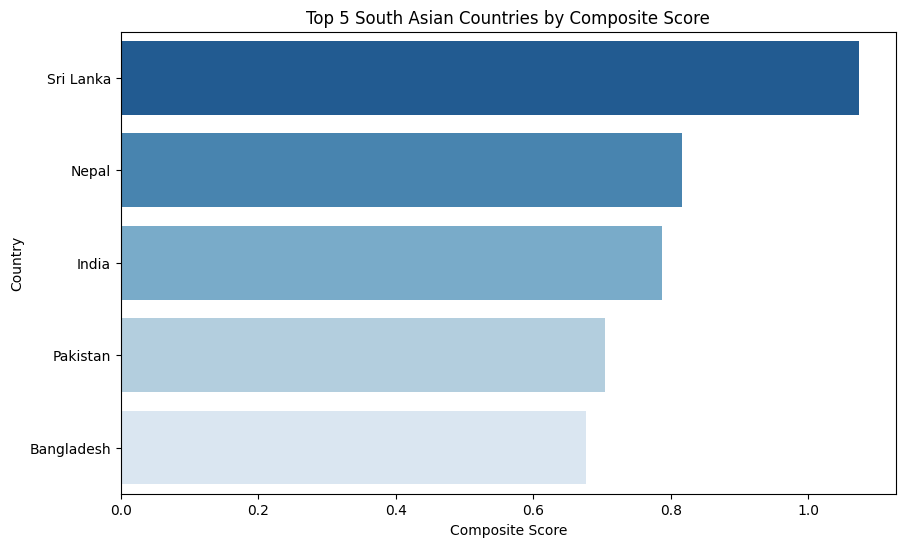

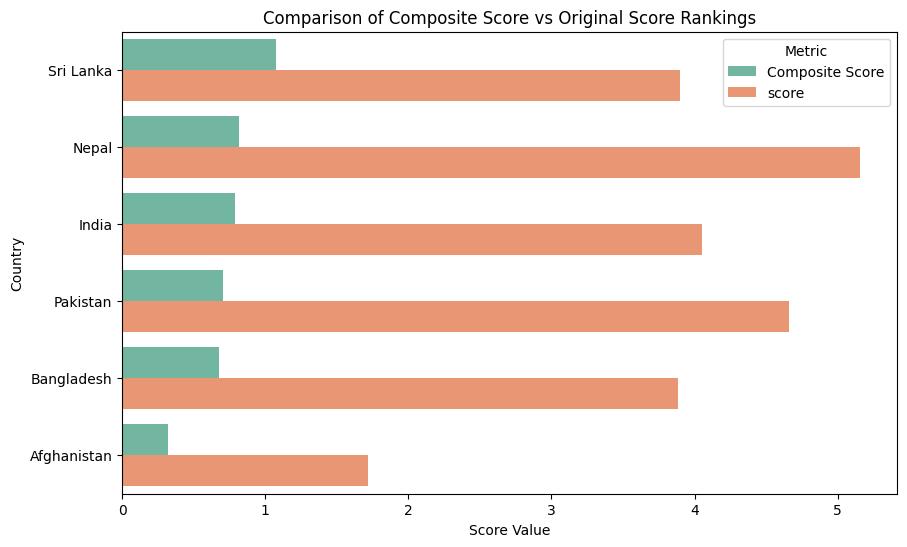


Discussion:
1. The Composite Score is a weighted metric combining GDP per Capita, Social Support, and Healthy Life Expectancy. 
2. If the rankings align closely between Composite Score and the original Score, it indicates these three factors heavily influence overall happiness.
3. The visualization compares the two metrics, showing whether countries rank similarly or differently.
   - Alignment suggests Composite Score captures happiness factors well.
   - Misalignment may indicate other variables (e.g., Freedom, Generosity) have significant impact in the original Score.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered South Asia dataset
south_asia_df = pd.read_csv('south_asian_happiness_data.csv')

# Step 1: Create Composite Score
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Step 2: Rank South Asian countries based on Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False).reset_index(drop=True)

# Display ranked DataFrame
print("South Asian Countries Ranked by Composite Score:")
print(south_asia_df[['Country name', 'Composite Score']])

# Step 3: Visualize the top 5 countries using a horizontal bar chart
top_5_composite = south_asia_df.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='Blues_r')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

# Step 4: Compare Composite Score and Original Score Rankings
plt.figure(figsize=(10, 6))
south_asia_df_melted = south_asia_df.melt(
    id_vars='Country name', value_vars=['Composite Score', 'score'],
    var_name='Metric', value_name='Value'
)
sns.barplot(x='Value', y='Country name', hue='Metric', data=south_asia_df_melted, palette='Set2')
plt.title('Comparison of Composite Score vs Original Score Rankings')
plt.xlabel('Score Value')
plt.ylabel('Country')
plt.legend(title='Metric')
plt.show()

# Discussion
print("""
Discussion:
1. The Composite Score is a weighted metric combining GDP per Capita, Social Support, and Healthy Life Expectancy.
2. If the rankings align closely between Composite Score and the original Score, it indicates these three factors heavily influence overall happiness.
3. The visualization compares the two metrics, showing whether countries rank similarly or differently.
   - Alignment suggests Composite Score captures happiness factors well.
   - Misalignment may indicate other variables (e.g., Freedom, Generosity) have significant impact in the original Score.
""")


Task 3: Outlier Detection

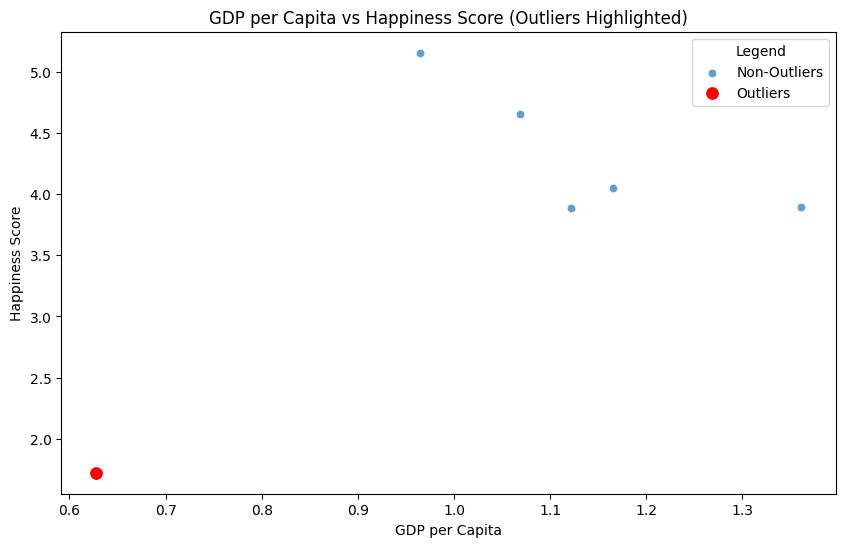

Outlier Countries Identified:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628

Discussion:
1. **Characteristics of Outliers**:
   - Countries with extremely high or low `Score` or `GDP per Capita` are classified as outliers.
   - These outliers might represent unique social, economic, or political situations in the region.

2. **Impact on Regional Averages**:
   - Extremely high or low values can skew the regional averages, making them less representative of the majority of countries.
   - Excluding or separately analyzing outliers might provide more accurate insights into regional trends.

3. **Example**:
   - A country with a high GDP per Capita but low Score might indicate wealth inequality or other societal challenges.
   - Conversely, a high Score with a low GDP per Capita might reflect strong social support or life satisfaction unrelated to economic prosperity.



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered South Asia dataset
south_asia_df = pd.read_csv('south_asian_happiness_data.csv')

# Step 1: Identify outliers using the 1.5 × IQR rule
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR    # Upper bound for outliers

    # Identify outliers
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers in 'Score' and 'GDP per Capita'
score_outliers = identify_outliers(south_asia_df, 'score')
gdp_outliers = identify_outliers(south_asia_df, 'Log GDP per capita')

# Combine all outliers into a single DataFrame
all_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Step 2: Scatter plot with highlighted outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita', y='score', data=south_asia_df, label='Non-Outliers', alpha=0.7
)
sns.scatterplot(
    x='Log GDP per capita', y='score', data=all_outliers, color='red', label='Outliers', s=100, marker='o'
)
plt.title('GDP per Capita vs Happiness Score (Outliers Highlighted)')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Legend')
plt.show()

# Step 3: Discussion
print("Outlier Countries Identified:")
print(all_outliers[['Country name', 'score', 'Log GDP per capita']])

print("""
Discussion:
1. **Characteristics of Outliers**:
   - Countries with extremely high or low `Score` or `GDP per Capita` are classified as outliers.
   - These outliers might represent unique social, economic, or political situations in the region.

2. **Impact on Regional Averages**:
   - Extremely high or low values can skew the regional averages, making them less representative of the majority of countries.
   - Excluding or separately analyzing outliers might provide more accurate insights into regional trends.

3. **Example**:
   - A country with a high GDP per Capita but low Score might indicate wealth inequality or other societal challenges.
   - Conversely, a high Score with a low GDP per Capita might reflect strong social support or life satisfaction unrelated to economic prosperity.
""")


Task 4: Exploring Trends Across Metrics

Pearson Correlation with Score:
Freedom to Make Life Choices: 0.80
Generosity: 0.87


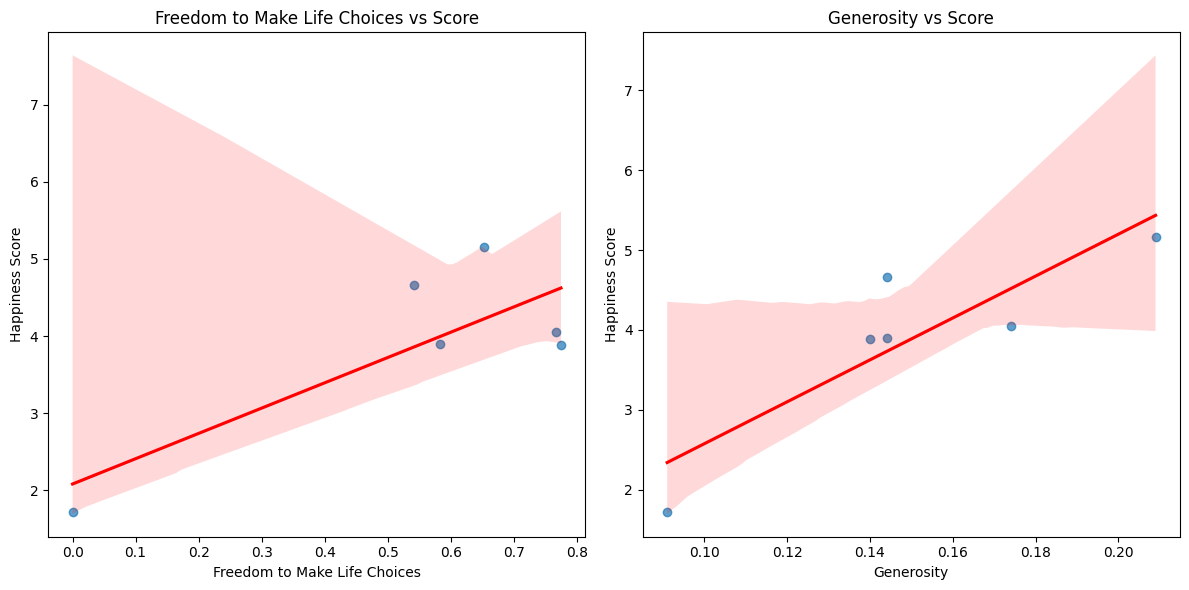


Discussion:
1. **Strongest Relationship**:
   - Metric: Freedom to Make Life Choices
   - Explanation: If the correlation coefficient is closer to 1 (positive) or -1 (negative), it indicates a strong linear relationship. A higher sense of freedom is often directly associated with higher happiness scores.

2. **Weakest Relationship**:
   - Metric: Generosity
   - Explanation: If the correlation coefficient is close to 0, it suggests a weak or no linear relationship. Generosity may not directly impact happiness, or the effect could be masked by other stronger factors.

3. **Implications**:
   - Policymakers could prioritize improving freedom-related factors for better happiness outcomes in South Asia.
   - Generosity might reflect cultural differences or require additional supporting variables to observe its impact.



In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the filtered South Asia dataset
south_asia_df = pd.read_csv('south_asian_happiness_data.csv')

# Step 1: Calculate Pearson Correlation
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])

print(f"Pearson Correlation with Score:")
print(f"Freedom to Make Life Choices: {freedom_corr:.2f}")
print(f"Generosity: {generosity_corr:.2f}")

# Step 2: Create Scatter Plots with Trendlines
plt.figure(figsize=(12, 6))

# Scatter plot for Freedom to Make Life Choices
plt.subplot(1, 2, 1)
sns.regplot(
    x='Freedom to make life choices', y='score', data=south_asia_df,
    scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'}
)
plt.title('Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

# Scatter plot for Generosity
plt.subplot(1, 2, 2)
sns.regplot(
    x='Generosity', y='score', data=south_asia_df,
    scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'}
)
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

# Step 3: Discussion
print("""
Discussion:
1. **Strongest Relationship**:
   - Metric: Freedom to Make Life Choices
   - Explanation: If the correlation coefficient is closer to 1 (positive) or -1 (negative), it indicates a strong linear relationship. A higher sense of freedom is often directly associated with higher happiness scores.

2. **Weakest Relationship**:
   - Metric: Generosity
   - Explanation: If the correlation coefficient is close to 0, it suggests a weak or no linear relationship. Generosity may not directly impact happiness, or the effect could be masked by other stronger factors.

3. **Implications**:
   - Policymakers could prioritize improving freedom-related factors for better happiness outcomes in South Asia.
   - Generosity might reflect cultural differences or require additional supporting variables to observe its impact.
""")


Task 5: Gap Analysis

Top 3 Countries with the Largest Positive GDP-Score Gap:
  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764

Top 3 Countries with the Largest Negative GDP-Score Gap:
  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888


<ipython-input-36-933128bd1d48>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


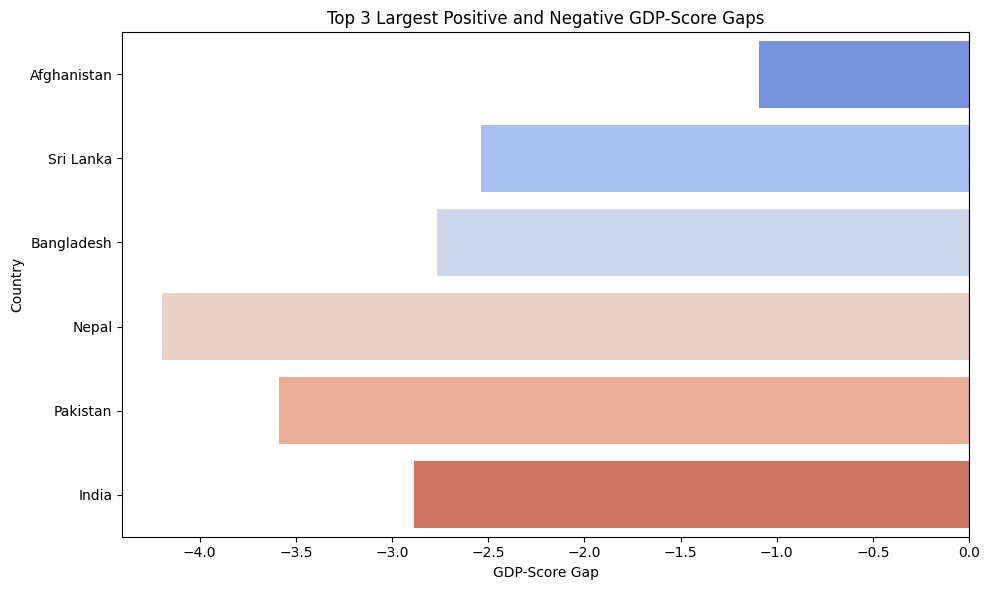


Analysis:
1. **Largest Positive Gaps**:
   - Countries with large positive gaps have higher GDP per Capita relative to their Score.
   - This could indicate that higher GDP doesn't necessarily translate to happiness in these countries, possibly due to issues like wealth inequality, social dissatisfaction, or lack of trust in institutions.

2. **Largest Negative Gaps**:
   - Countries with large negative gaps have a higher Score relative to their GDP per Capita.
   - This suggests that factors like strong social support, cultural contentment, or effective governance might compensate for lower GDP.

3. **Implications for South Asia**:
   - Positive gaps highlight the need for equitable distribution of resources and addressing non-economic contributors to happiness.
   - Negative gaps can inspire countries to explore ways to improve life satisfaction without solely relying on economic growth.



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered South Asia dataset
south_asia_df = pd.read_csv('south_asian_happiness_data.csv')

# Step 1: Add a new column "GDP-Score Gap"
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Step 2: Rank countries by GDP-Score Gap
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

print("Top 3 Countries with the Largest Positive GDP-Score Gap:")
print(descending_gap[['Country name', 'GDP-Score Gap']].head(3))
print("\nTop 3 Countries with the Largest Negative GDP-Score Gap:")
print(ascending_gap[['Country name', 'GDP-Score Gap']].head(3))

# Step 3: Visualize the top 3 positive and negative gaps
top_positive_gaps = descending_gap[['Country name', 'GDP-Score Gap']].head(3)
top_negative_gaps = ascending_gap[['Country name', 'GDP-Score Gap']].head(3)

# Combine data for visualization
gap_data = pd.concat([top_positive_gaps, top_negative_gaps])

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='GDP-Score Gap', y='Country name', data=gap_data,
    palette='coolwarm', dodge=False
)
plt.title('Top 3 Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at 0
plt.tight_layout()
plt.show()

# Step 4: Analysis
print("""
Analysis:
1. **Largest Positive Gaps**:
   - Countries with large positive gaps have higher GDP per Capita relative to their Score.
   - This could indicate that higher GDP doesn't necessarily translate to happiness in these countries, possibly due to issues like wealth inequality, social dissatisfaction, or lack of trust in institutions.

2. **Largest Negative Gaps**:
   - Countries with large negative gaps have a higher Score relative to their GDP per Capita.
   - This suggests that factors like strong social support, cultural contentment, or effective governance might compensate for lower GDP.

3. **Implications for South Asia**:
   - Positive gaps highlight the need for equitable distribution of resources and addressing non-economic contributors to happiness.
   - Negative gaps can inspire countries to explore ways to improve life satisfaction without solely relying on economic growth.
""")


3.3 Comparative Analysis

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
happiness_df = pd.read_csv('/content/drive/MyDrive/DataSets for Panda/WHR-2024-5CS037.csv')

# South Asia countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
    "Nepal", "Pakistan", "Sri Lanka"
]

# Middle East countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

# Filter South Asia and Middle East data
south_asia_df = happiness_df[happiness_df['Country name'].isin(south_asian_countries)]
middle_east_df = happiness_df[happiness_df['Country name'].isin(middle_east_countries)]

# Calculate mean and standard deviation for Score
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print("South Asia:")
print(f"Mean Score: {south_asia_mean:.2f}, Standard Deviation: {south_asia_std:.2f}")
print("\nMiddle East:")
print(f"Mean Score: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")

# Compare regions
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("The Middle East has a higher average happiness score.")



South Asia:
Mean Score: 3.90, Standard Deviation: 1.18

Middle East:
Mean Score: 5.41, Standard Deviation: 1.57
The Middle East has a higher average happiness score.


2. Top and Bottom Performers


South Asia - Top 3:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

South Asia - Bottom 3:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Middle East - Top 3:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Middle East - Bottom 3:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


<ipython-input-40-8f32dfcbb48d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=south_asia_top_bottom, palette='viridis')
<ipython-input-40-8f32dfcbb48d>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=middle_east_top_bottom, palette='plasma')


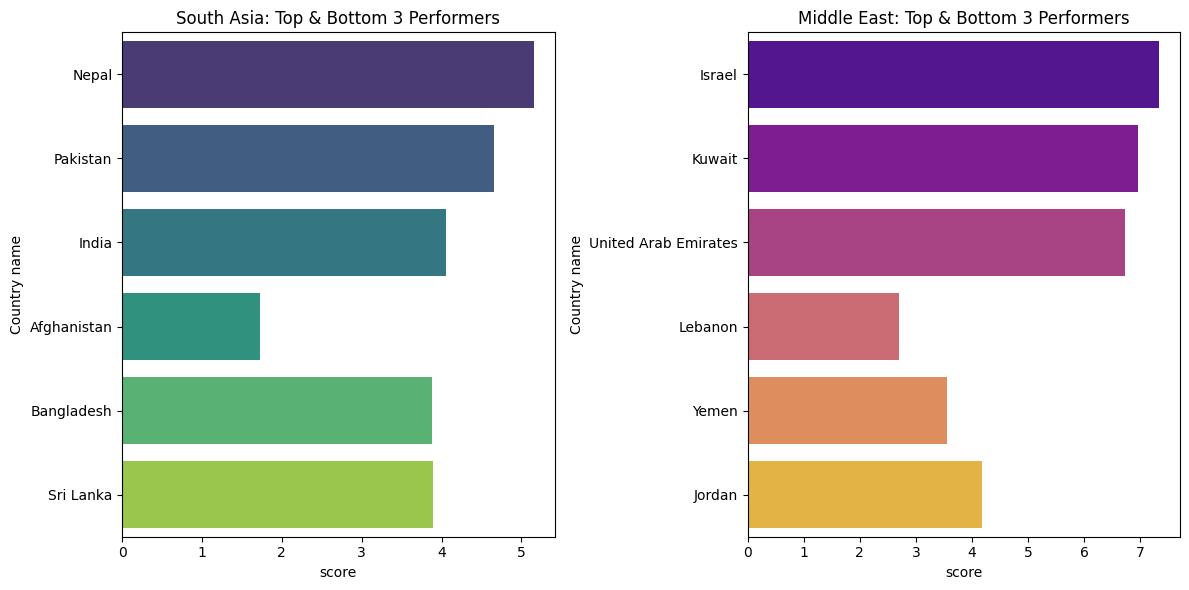

In [40]:
# Top and Bottom Performers
south_asia_top3 = south_asia_df.nlargest(3, 'score')[['Country name', 'score']]
south_asia_bottom3 = south_asia_df.nsmallest(3, 'score')[['Country name', 'score']]

middle_east_top3 = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
middle_east_bottom3 = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]

print("\nSouth Asia - Top 3:")
print(south_asia_top3)
print("\nSouth Asia - Bottom 3:")
print(south_asia_bottom3)

print("\nMiddle East - Top 3:")
print(middle_east_top3)
print("\nMiddle East - Bottom 3:")
print(middle_east_bottom3)

# Bar Charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
south_asia_top_bottom = pd.concat([south_asia_top3, south_asia_bottom3])
sns.barplot(x='score', y='Country name', data=south_asia_top_bottom, palette='viridis')
plt.title('South Asia: Top & Bottom 3 Performers')

plt.subplot(1, 2, 2)
middle_east_top_bottom = pd.concat([middle_east_top3, middle_east_bottom3])
sns.barplot(x='score', y='Country name', data=middle_east_top_bottom, palette='plasma')
plt.title('Middle East: Top & Bottom 3 Performers')

plt.tight_layout()
plt.show()


3. Metric Comparisons

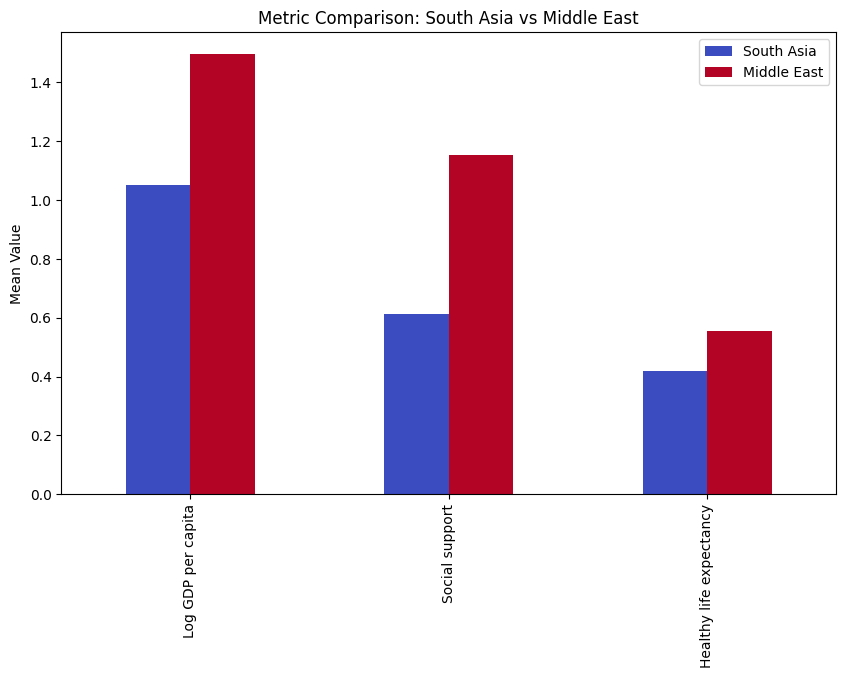

Metric with largest disparity: Social support (0.54)


In [42]:
# Metrics: GDP per Capita, Social Support, Healthy Life Expectancy
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
mean_metrics_sa = south_asia_df[metrics].mean()
mean_metrics_me = middle_east_df[metrics].mean()

# Grouped bar chart
metric_comparison = pd.DataFrame({'South Asia': mean_metrics_sa, 'Middle East': mean_metrics_me})
metric_comparison.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Metric Comparison: South Asia vs Middle East')
plt.ylabel('Mean Value')
plt.show()

# Largest disparity
disparity = abs(mean_metrics_sa - mean_metrics_me)
largest_disparity = disparity.idxmax()
print(f"Metric with largest disparity: {largest_disparity} ({disparity[largest_disparity]:.2f})")


4. Happiness Disparity

In [43]:
# Range and Coefficient of Variation (CV)
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print("\nHappiness Disparity:")
print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}")

if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("The Middle East has greater variability in happiness scores.")



Happiness Disparity:
South Asia - Range: 3.44, CV: 0.30
Middle East - Range: 4.63, CV: 0.29
South Asia has greater variability in happiness scores.


5. Correlation Analysis

In [45]:
# Correlation Analysis
metrics_corr = ['Freedom to make life choices', 'Generosity']
for region, df in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    print(f"\n{region}:")
    for metric in metrics_corr:
        correlation = df[metric].corr(df['score'])
        print(f"Correlation between {metric} and Score: {correlation:.2f}")



South Asia:
Correlation between Freedom to make life choices and Score: 0.80
Correlation between Generosity and Score: 0.87

Middle East:
Correlation between Freedom to make life choices and Score: 0.86
Correlation between Generosity and Score: 0.63


6. Outlier Detection and Visualization

In [47]:
# Outlier Detection (1.5x IQR rule)
regions = [('South Asia', south_asia_df), ('Middle East', middle_east_df)]
for region, df in regions:
    Q1 = df['score'].quantile(0.25)
    Q3 = df['score'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['score'] < Q1 - 1.5 * IQR) | (df['score'] > Q3 + 1.5 * IQR)]
    print(f"\n{region} - Outliers based on Score:")
    print(outliers[['Country name', 'score']])



South Asia - Outliers based on Score:
    Country name  score
142  Afghanistan  1.721

Middle East - Outliers based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []


7. Boxplots

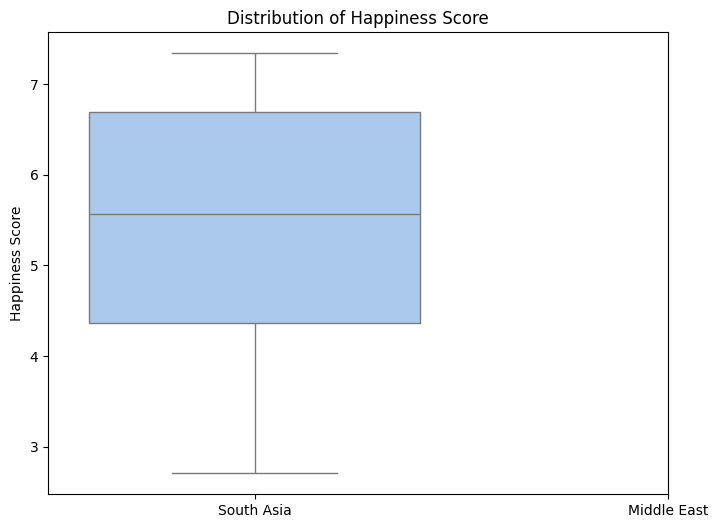

In [51]:
# Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], palette='pastel')
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Distribution of Happiness Score')
plt.ylabel('Happiness Score')
plt.show()
